Build a regression model.

In [9]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import csv

In [10]:
## csv file

flights_df = pd.read_csv('../data/flights_clean.csv')
flights_df.head()

,ID,Origin,Destination,Origin_City,Origin_State,Destination_City,Destination_State,Passengers,Seats,Flights,Distance,Fly_Date,Origin_Population,Destination_Population
0,AberdeenHuron00200807,ABR,HON,Aberdeen,SD,Huron,SD,0,0,1,74,200807,38991,15946
1,AberdeenHuron2757200611,ABR,HON,Aberdeen,SD,Huron,SD,27,57,3,74,200611,38886,15501
2,AberdeenHuron3051170200702,ABR,HON,Aberdeen,SD,Huron,SD,305,1170,39,74,200702,39026,15760
3,AberdeenHuron3076200704,ABR,HON,Aberdeen,SD,Huron,SD,30,76,4,74,200704,39026,15760
4,AberdeenHuron3121170200706,ABR,HON,Aberdeen,SD,Huron,SD,312,1170,39,74,200706,39026,15760


In [11]:
## print dataframe
print(flights_df)

                                ID Origin Destination Origin_City  \
0            AberdeenHuron00200807    ABR         HON    Aberdeen   
1          AberdeenHuron2757200611    ABR         HON    Aberdeen   
2       AberdeenHuron3051170200702    ABR         HON    Aberdeen   
3          AberdeenHuron3076200704    ABR         HON    Aberdeen   
4       AberdeenHuron3121170200706    ABR         HON    Aberdeen   
...                            ...    ...         ...         ...   
581058   ZanesvilleAtlanta00200402    ZZV         PDK  Zanesville   
581059   ZanesvilleAtlanta00200409    ZZV         PDK  Zanesville   
581060   ZanesvilleDetroit00200310    ZZV         YIP  Zanesville   
581061   ZanesvilleDetroit00200312    ZZV         YIP  Zanesville   
581062   ZanesvilleDetroit00200704    ZZV         YIP  Zanesville   

       Origin_State Destination_City Destination_State  Passengers  Seats  \
0                SD            Huron                SD           0      0   
1                

In [12]:
## information about all columns
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581063 entries, 0 to 581062
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ID                      581063 non-null  object
 1   Origin                  581063 non-null  object
 2   Destination             581063 non-null  object
 3   Origin_City             581063 non-null  object
 4   Origin_State            581063 non-null  object
 5   Destination_City        581063 non-null  object
 6   Destination_State       581063 non-null  object
 7   Passengers              581063 non-null  int64 
 8   Seats                   581063 non-null  int64 
 9   Flights                 581063 non-null  int64 
 10  Distance                581063 non-null  int64 
 11  Fly_Date                581063 non-null  int64 
 12  Origin_Population       581063 non-null  int64 
 13  Destination_Population  581063 non-null  int64 
dtypes: int64(7), object(7)
memory usage:

In [13]:
# number of unique values in column ID
flights_df['ID'].nunique()

552290

In [15]:
flights_df.isnull().sum()

ID                        0
Origin                    0
Destination               0
Origin_City               0
Origin_State              0
Destination_City          0
Destination_State         0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly_Date                  0
Origin_Population         0
Destination_Population    0
dtype: int64

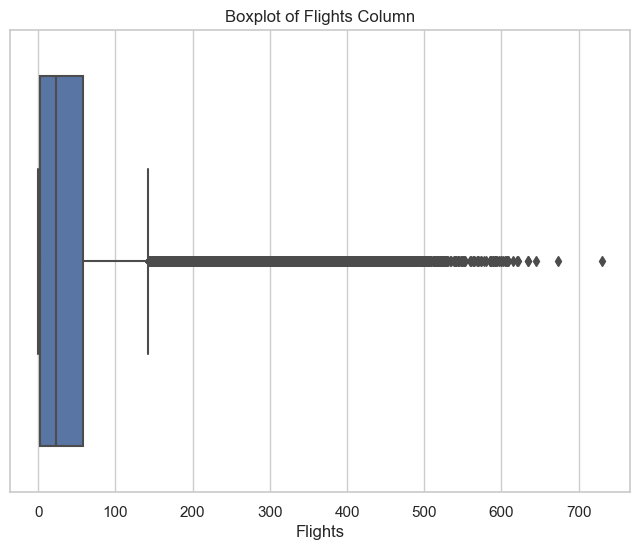

In [18]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the boxplot for the "Flights" column
sns.boxplot(x=flights_df["Flights"])

# Set labels and title
plt.xlabel("Flights")
plt.title("Boxplot of Flights Column")

# Show the plot
plt.show()

#### Regression model

In [19]:
# Predicting 'Passengers' as the target variable and using 'Seats' and 'Flights' as features
X = flights_df[['Seats', 'Flights']]  # Feature(s)
y = flights_df['Passengers']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model, which includes p-values, adjusted R-squared, and F-statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          7.861e+06
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:59:26   Log-Likelihood:                     -3.8542e+06
No. Observations:              464850   AIC:                                  7.708e+06
Df Residuals:                  464848   BIC:                                  7.708e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In this case, both 'Seats' and 'Flights' have very low p-values (close to zero), indicating that they are statistically significant predictors.

Overall, the model explains a substantial portion of the variance in 'Passengers,' and both 'Seats' and 'Flights' are statistically significant 
predictors. However, some aspects of model fit and distribution of residuals may need further investigation, particularly the non-normality of 
residuals indicated by the Jarque-Bera test.

#### Classification Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the threshold for binary classification
threshold = 100  # You can adjust this threshold based on your problem

# Features: 'Seats' and 'Flights'
X = flights_df[['Seats', 'Flights']]
y = (flights_df['Passengers'] > threshold).astype(int)  # Create a binary target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (Logistic Regression)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9332002443788561
Confusion Matrix:
 [[28054  2480]
 [ 5283 80396]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     30534
           1       0.97      0.94      0.95     85679

    accuracy                           0.93    116213
   macro avg       0.91      0.93      0.92    116213
weighted avg       0.94      0.93      0.93    116213




The classification model has a high accuracy of approximately 93.32%. It performs well in precision, recall, and F1-score for both classes, 
indicating that it can effectively distinguish between them (0 and 1). The classification report provides a detailed breakdown of the model's 
performance for each class.